In [1]:
from pathlib import Path, PurePath
from collections import Counter
import re
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

filtered_tables = list(Path("./data//filteredData").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables))


num of tables: 505672


In [2]:
allowed_labels = Path("./data_preparation/allowedLabels.txt").read_text().lower().split("\n")

In [3]:
class DataCounter:
    def __init__(self, paths):
        self.labels_counter = Counter()
        self.width_counter = Counter()

        for label in allowed_labels:
            self.labels_counter[label] = 0

        for path in paths:
            with open(path) as file:
                labels = file.readline().replace("\n", "").lower().split("|")

            for label in labels:
                self.labels_counter[label] += 1

            self.width_counter[len(labels)] += 1



In [4]:
dc = DataCounter(filtered_tables)

In [6]:
def print_labels(dc: DataCounter, top: int, ignore_allowed=False):
    pairs = dc.labels_counter.most_common(top)
    for (x, y) in pairs:
        if ignore_allowed and x.lower() in allowed_labels:
            continue
        print(x, y)

In [7]:
def print_widths(dc: DataCounter):
    pairs = dc.width_counter.most_common(50)
    for (x, y) in pairs:
        print(f"widht: {x}, num: {y}")

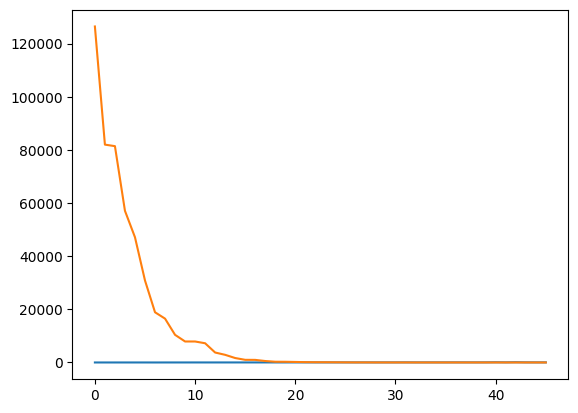

In [8]:
plt.plot(dc.width_counter.most_common(50))

In [9]:
print_widths(dc)

widht: 2, num: 126414
widht: 4, num: 81964
widht: 3, num: 81389
widht: 5, num: 57062
widht: 6, num: 47117
widht: 7, num: 30842
widht: 1, num: 18892
widht: 8, num: 16498
widht: 9, num: 10398
widht: 10, num: 7898
widht: 13, num: 7895
widht: 11, num: 7234
widht: 12, num: 3748
widht: 14, num: 2876
widht: 15, num: 1673
widht: 17, num: 999
widht: 16, num: 978
widht: 20, num: 546
widht: 18, num: 280
widht: 19, num: 262
widht: 21, num: 197
widht: 23, num: 124
widht: 22, num: 94
widht: 24, num: 85
widht: 25, num: 65
widht: 29, num: 37
widht: 26, num: 23
widht: 30, num: 23
widht: 28, num: 9
widht: 34, num: 8
widht: 33, num: 8
widht: 44, num: 5
widht: 31, num: 4
widht: 32, num: 4
widht: 36, num: 3
widht: 35, num: 3
widht: 42, num: 2
widht: 40, num: 2
widht: 38, num: 2
widht: 45, num: 2
widht: 80, num: 2
widht: 49, num: 1
widht: 97, num: 1
widht: 46, num: 1
widht: 39, num: 1
widht: 37, num: 1


In [10]:
print_labels(dc, 10000, ignore_allowed=True)

рецензии 27189
всего 20052
итого 18900
выступление 18404
еврокубки 17705
финал 16113
кубок 15112
чемпионат 14757
роль в фильмах 11810
соревнование 11668
турнир 11090
чистота крови 10656
титулы попокрытиям 9544
титулы по меступроведенияматчей турнира 9502
полуфинал 9371
спортсмены 9346
патронус 8928
факультет 8088
пример 7770
квалификация 7505
счёт 7475
период 7077
кубки 6971
очки 6367
результаты 6347
волшебная палочка 6336
высшаяпозиция 6293
золото 6115
серебро 6103
бронза 6067
прочие 5729
дисциплина 5696
турниры 5535
второй 5474
третий 5461
первый 5263
голы 5241
№ всезоне 5198
сертификация 5197
№ всериале 5171
легенда: 5058
итог 4974
запасной 4941
четвёртый 4936
позиции в чартах 4854
соревнования 4677
соперник 4630
высшая позиция 4620
премия 4509
четвертьфинал 4417
победитель 4348
кубок лиги 4298
гонка 4220
регулярный сезон 4210
чарты 4184
сборная 4115
команда 1 3938
команда 2 3933
высшая позиция в чартах 3865
счёт в финале 3780
предварительный раунд 3723
кубок страны 3546
раунд 3502


### After filtrating out those tables that have unallowed labels 
---

In [11]:
filtered_tables2 = list(Path("./data/filteredData2").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables2))

num of tables: 55208


In [12]:
dc2 = DataCounter(filtered_tables2)

In [13]:
print_labels(dc2, 3330)

роль 21356
актёр 19175
год 18285
название 7922
результат 7341
место 4886
категория 4727
награда 4168
город 3818
работа 3402
клуб 3117
дата 2749
спортсмен 2654
страна 2628
фильм 2618
имя 2471
альбом 2426
команда 2120
песня 1908
исполнитель 1793
режиссёр 1753
должность 1628
оригинальное название 1466
позиция 1448
игрок 1327
население, человек 1263
время 1130
кино 1077
сезон 1060
население 974
русское название 907
описание 888
персонаж 792
ссылка 730
дата рождения 715
тип 634
гражданство 575
статус 559
номер 546
изображение 529
дистанция 500
годы 493
год выпуска 483
источник 440
условные цветовые обозначения 438
html 398
артист 389
местонахождение 371
продюсер 340
место проведения 324
сценарист 324
организация 316
бортовой номер 290
код 278
скорость ветра 274
численность 273
регион 261
продажи 244
формат 241
символ 229
событие 219
ссылки 211
количество 203
лига 193
титул 184
национальность 175
месяц 168
стадия 153
численность населения 139
канал 129
группа 122
жанр 121
платформа 119
проце

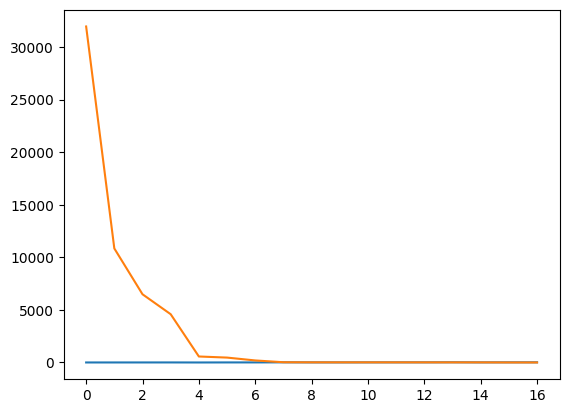

In [14]:
plt.plot(dc2.width_counter.most_common(50))

In [15]:
print_widths(dc2)

widht: 2, num: 31950
widht: 3, num: 10844
widht: 4, num: 6487
widht: 5, num: 4589
widht: 1, num: 570
widht: 6, num: 466
widht: 7, num: 194
widht: 14, num: 23
widht: 9, num: 14
widht: 8, num: 13
widht: 11, num: 13
widht: 12, num: 12
widht: 13, num: 11
widht: 19, num: 10
widht: 10, num: 9
widht: 15, num: 2
widht: 16, num: 1


***

In [18]:
num = np.random.randint(0, 30000)

print(filtered_tables2[num])
table = filtered_tables2[num]
pd.read_csv(table, delimiter="|")


data/filteredData2/1903001/table_0.csv


,Год,Название,Роль
0,1977,«ABBA: Фильм»,Играет саму себя
1,1982,Nöjesmaskinen,Играет саму себя
2,1983,Raskenstam,Лиза Маттсон
